In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive (3).zip to archive (3).zip


In [2]:
import zipfile
import os

# Extract the ZIP file to a folder called 'titanic_data'
with zipfile.ZipFile("archive (3).zip", 'r') as zip_ref:
    zip_ref.extractall("titanic_data")

# List the extracted files
print("Extracted Files:")
print(os.listdir("titanic_data"))

Extracted Files:
['train.csv']


In [3]:
import pandas as pd

df = pd.read_csv("titanic_data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Shape and data types
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Summary info
df.info()

# Statistical summary
df.describe(include='all')

Shape: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-nu

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


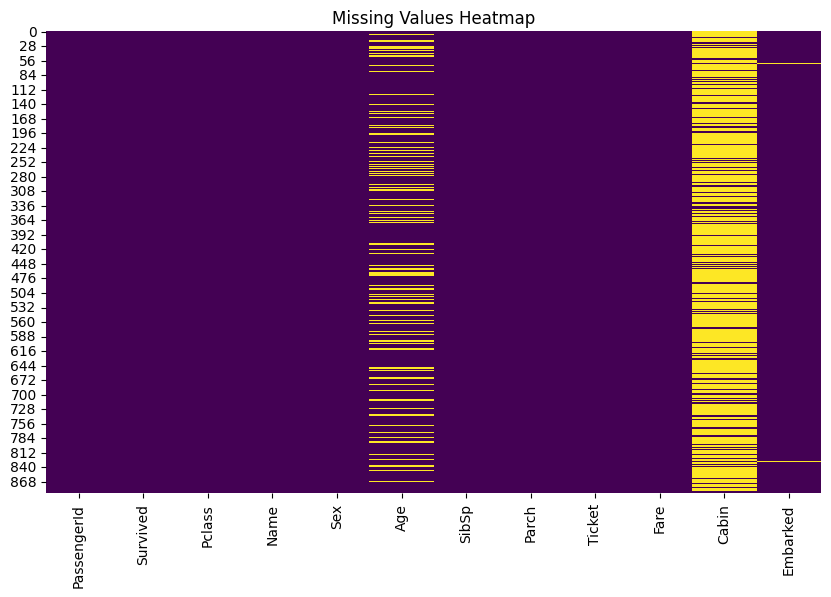

In [5]:
# Check total missing values
print("Missing Values:\n", df.isnull().sum())

# Visualize missing values with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

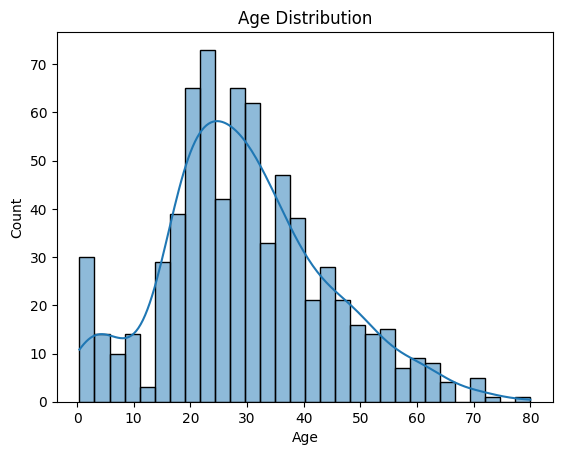

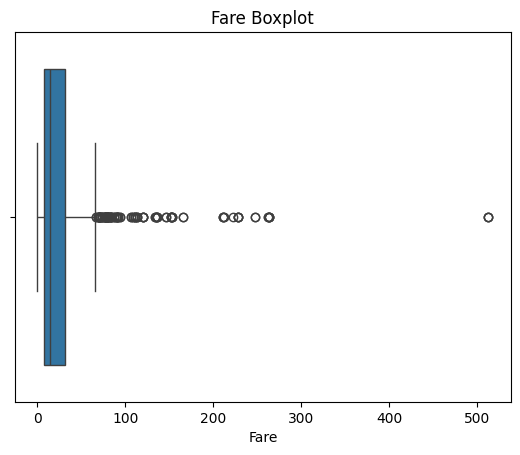

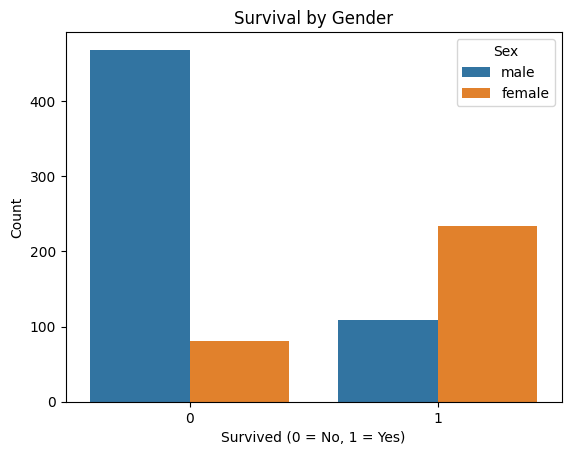

In [6]:
# Age distribution
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Fare boxplot to check for outliers
sns.boxplot(x=df['Fare'])
plt.title("Fare Boxplot")
plt.xlabel("Fare")
plt.show()

# Survival count by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.show()

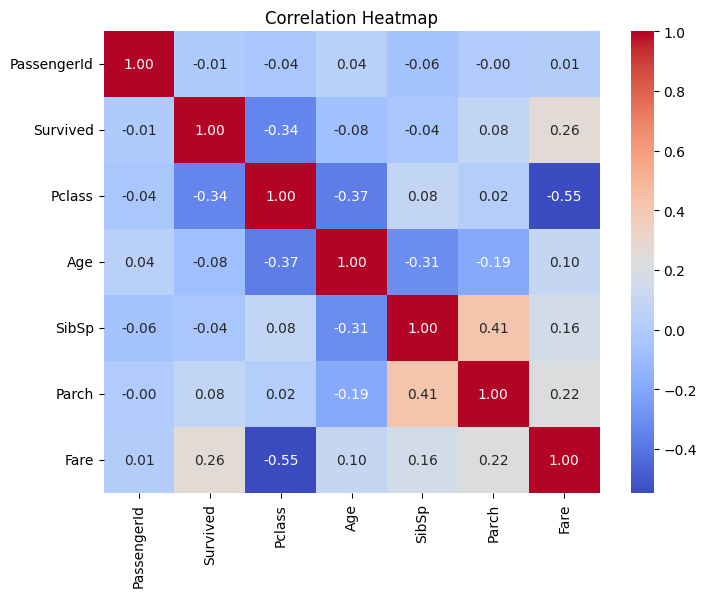

In [7]:
# Correlation matrix (numerical columns only)
corr = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# 1. Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# 2. Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 3. Fill missing Cabin with "Unknown"
df['Cabin'].fillna("Unknown", inplace=True)

# ✅ Recheck missing values
print("Remaining Missing Values:\n", df.isnull().sum())

Remaining Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


/tmp/ipython-input-8-2482308467.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-8-2482308467.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [9]:
# Survival rate by Passenger Class
print("Survival Rate by Pclass:\n", df.groupby('Pclass')['Survived'].mean(), "\n")

# Survival rate by Gender
print("Survival Rate by Sex:\n", df.groupby('Sex')['Survived'].mean(), "\n")

# Survival rate by Embarked
print("Survival Rate by Embarked:\n", df.groupby('Embarked')['Survived'].mean(), "\n")

# Average Fare by Class
print("Average Fare by Pclass:\n", df.groupby('Pclass')['Fare'].mean(), "\n")

# Average Age by Class
print("Average Age by Pclass:\n", df.groupby('Pclass')['Age'].mean())

Survival Rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 

Survival Rate by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 

Survival Rate by Embarked:
 Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64 

Average Fare by Pclass:
 Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64 

Average Age by Pclass:
 Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64


Fare skewness (before): 4.787316519674893


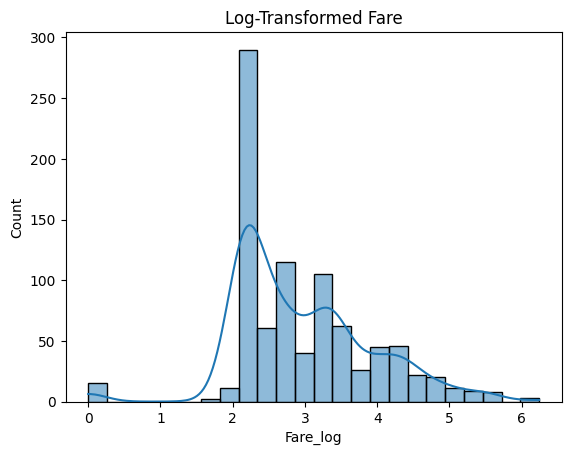

Fare skewness (after): 0.3949280095189306


In [12]:
import numpy as np

# Check skewness before
print("Fare skewness (before):", df['Fare'].skew())

# Apply log transformation
df['Fare_log'] = np.log1p(df['Fare'])

# Plot after transformation
sns.histplot(df['Fare_log'], kde=True)
plt.title("Log-Transformed Fare")
plt.show()

# Check skewness after
print("Fare skewness (after):", df['Fare_log'].skew())
